## CS 457 - Homework Assignment 10: Clustering
### Fahad Ahmed Shaikh
#### fs05847@st.habib.edu.pk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('McDonaldsMenu.csv')
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


## Q1

In [3]:
df1 = df.drop(['Category',"Item"],axis=1)

### Dropped all the columns that have classes

## Q2

In [4]:
df2 = df1.drop('Serving Size',axis=1)

## Q3

In [5]:
scaler = MinMaxScaler()
# transform data
df3 = scaler.fit_transform(df2)
# df[1:15]

#### All the data is now scaled (normalize).

### Q4

In [6]:
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 99)
    kmeans.fit(df3)
    wss.append(kmeans.inertia_)

c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\c

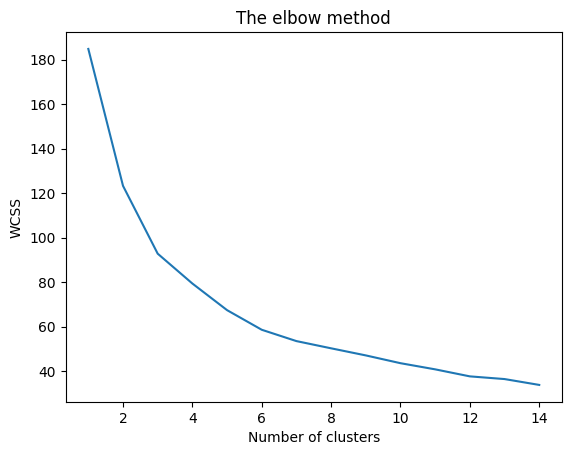

In [7]:
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## As we can see from the graph above the optimal number of clusters is 6. The graph decreases rapid after cluster 3 but it gets steady/smooth decline after cluster 6.
## The optimal number of clusters is 6. As seen, the graph is decreasing rapidly till cluster is 3, but then it gets steady til the cluster is 6.
### optimal number of clusters = 6

## Q5

In [8]:
# optimal number of clusters = 6
kmeans = KMeans(n_clusters = 6, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(df3)

c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
Y

array([4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4,
       3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 4, 4, 4, 0, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4,
       4, 3, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 0, 0, 4, 3, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 0, 4, 4, 0, 0, 2, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 2])

## There are 6 clusters as seen. The first cluter is the last element. The third cluster is the first element. The sixth and last cluster is the fourth element.

## Q6

Text(0.5, 1.0, 'The dataset post clustering')

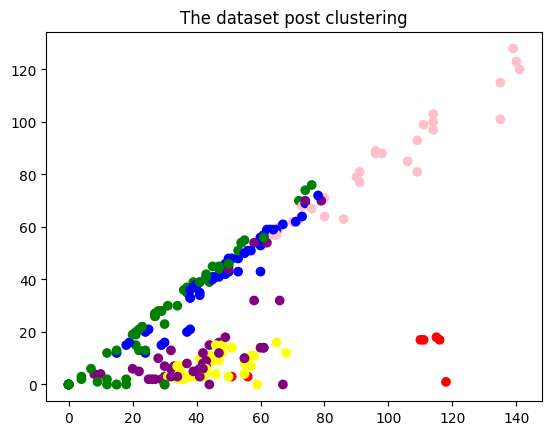

In [10]:
color2=np.array(['green','red','blue',"yellow","purple","pink"])
plt.scatter(x=df2.Carbohydrates,y=df2.Sugars,c=color2[kmeans.labels_])
plt.title("The dataset post clustering")


## There are 6 clusters with different colours. Some clusters get separate colours while some get mixed. 
## Yellow and green for example, are mixing at some point whereas there are clusters for purple separately.

### Q7

In [11]:
C1 = df2.iloc[Y == 0, :]
C2 = df2.iloc[Y == 1, :]
C3 = df2.iloc[Y == 2, :]
C4 = df2.iloc[Y == 3, :]
C5 = df2.iloc[Y == 4, :]
C6 = df2.iloc[Y == 5, :]

In [12]:
C1['Calories'].mean()

127.10144927536231

In [13]:
C2['Calories'].mean()

1100.0

In [14]:
C3['Calories'].mean()

303.3333333333333

In [15]:
C4['Calories'].mean()

548.695652173913

In [16]:
C5['Calories'].mean()

350.8333333333333

In [17]:
C6['Calories'].mean()

633.3333333333334

## Q8

## We can see from above that C2 has the highest value so its a high calory item, and for people who want high calories in their diet
## C4 has a very low value so it contains very low calories. Hence, is for people who want low calories in their diet
## C6 is the item that moderate calories so if people want a balance diet, they should choose C6 

## Q9

## C2 = DeathWish burger (becuase it contains very high calories)
## C5 = GymLover (becuase it contains high calories to gain mass)
## C6= BalancedCalorized
## C4 = NoCalory
## C1= LowEnergy